<a href="https://colab.research.google.com/github/iam-fern/real_data/blob/main/China_Health_and_Nutrition_Survey_(CHNS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# where your file is located
FILE_LOCATION = '/content/drive/My Drive/pattern_realdata/pexam_pub_12.sas7bdat'

In [4]:
df = pd.read_sas(FILE_LOCATION)
df
#df.head()

/usr/local/lib/python3.7/dist-packages/pandas/io/sas/sas7bdat.py:800: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  rslt[name] = self._byte_chunk[jb, :].view(dtype=self.byte_order + "d")


,IDind,U25,U26,U27,U28,U29,U34,U35,U36,U424,...,U16,U17,U18,U19,U1D,CM1,U7_91,U8_91,U9_91,temp
0,1.111010e+11,0.0,NaN,NaN,NaN,NaN,1.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.111010e+11,1.0,28.0,0.0,NaN,360.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.4
2,1.111010e+11,0.0,NaN,NaN,NaN,NaN,1.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1.111010e+11,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.4
4,1.111010e+11,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126403,5.523040e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,36.7
126404,5.523042e+11,1.0,18.0,1.0,12.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,37.0
126405,5.523042e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,37.1
126406,5.523042e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,37.0


###### **U21:** AGE (YEARS) AT 1ST MENSTRUATION  อายุ (ปี) เมื่อมีประจำเดือนครั้งแรก
###### **U22:** DIAGNOSED WITH HIGH BLOOD PRESSURE? ตรวจพบความดันโลหิตสูงหรือไม่?
###### **U23:** OF YEARS HAD HIGH BLOOD PRESSURE ปีมีความดันโลหิตสูง
###### **U24:** TAKING ANTI-HYPERTENSION DRUGS? ทานยาป้องกันความดันโลหิตสูงหรือไม่?
###### **U24A:** DIAGNOSED WITH DIABETES? วินิจฉัยว่าเป็นเบาหวานหรือไม่?
###### **U24B:** AGE (YEARS) AT DIABETES DIAGNOSIS อายุ (ปี) ที่การวินิจฉัยโรคเบาหวาน
###### **U24C:** DIABETES TREATMENT: SPECIAL DIET การรักษาโรคเบาหวาน: อาหารพิเศษ

In [18]:
table = df[['IDind', 'U21', 'U22', 'U23', 'U24', 'U24A', 'U24B', 'U24C']]
table

,IDind,U21,U22,U23,U24,U24A,U24B,U24C
0,1.111010e+11,NaN,1.0,30.0,1.0,0.0,NaN,NaN
1,1.111010e+11,NaN,1.0,40.0,1.0,0.0,NaN,NaN
2,1.111010e+11,NaN,1.0,35.0,1.0,1.0,62.0,0.0
3,1.111010e+11,NaN,1.0,40.0,1.0,1.0,38.0,1.0
4,1.111010e+11,NaN,1.0,1.0,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
126403,5.523040e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126404,5.523042e+11,NaN,0.0,NaN,NaN,0.0,NaN,NaN
126405,5.523042e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126406,5.523042e+11,NaN,0.0,NaN,NaN,0.0,NaN,NaN


In [23]:
# Define in which columns to look for missing values.
table = table.dropna(subset=['U23', 'U24'])
table

,IDind,U21,U22,U23,U24,U24A,U24B,U24C
0,1.111010e+11,NaN,1.0,30.0,1.0,0.0,NaN,NaN
1,1.111010e+11,NaN,1.0,40.0,1.0,0.0,NaN,NaN
2,1.111010e+11,NaN,1.0,35.0,1.0,1.0,62.0,0.0
3,1.111010e+11,NaN,1.0,40.0,1.0,1.0,38.0,1.0
4,1.111010e+11,NaN,1.0,1.0,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
126359,5.523040e+11,NaN,1.0,3.0,1.0,0.0,NaN,NaN
126366,5.523040e+11,NaN,1.0,3.0,1.0,0.0,NaN,NaN
126368,5.523040e+11,NaN,1.0,6.0,1.0,1.0,40.0,0.0
126369,5.523040e+11,NaN,1.0,10.0,1.0,0.0,NaN,NaN


In [72]:
table1 = df[['U22', 'U24']]
table1

,U22,U24
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
126403,NaN,NaN
126404,0.0,NaN
126405,NaN,NaN
126406,0.0,NaN


###### **U22:** DIAGNOSED WITH HIGH BLOOD PRESSURE? ตรวจพบความดันโลหิตสูงหรือไม่?
###### **U23:** OF YEARS HAD HIGH BLOOD PRESSURE ปีมีความดันโลหิตสูง
###### **U24:** TAKING ANTI-HYPERTENSION DRUGS? ทานยาป้องกันความดันโลหิตสูงหรือไม่?

In [73]:
# ลบข้อมูลที่มี missing values
table1 = table1.dropna()
table1

,U22,U24
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
126359,1.0,1.0
126366,1.0,1.0
126368,1.0,1.0
126369,1.0,1.0


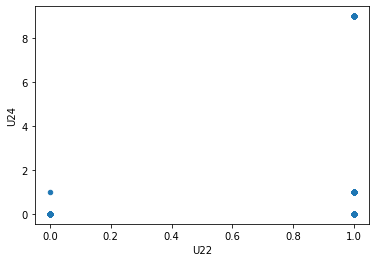

In [74]:
table1.plot(x ='U22', y='U24', kind = 'scatter')